In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from atm_transport import energy_flux

In [30]:
ctl_300 = xr.open_dataset('./../data_isca/t42_300_ga7_alb0.3_clim.nc')
ctl_1200 = xr.open_dataset('./../data_isca/t42_1200_ga7_alb0.3_clim.nc')
ctl_4800 = xr.open_dataset('./../data_isca/t42_4800_ga7_alb0.3_clim.nc')
ctl_300 = ctl_300.where(ctl_300<1e10,np.nan)
ctl_1200 = ctl_1200.where(ctl_1200<1e10,np.nan)
ctl_4800 = ctl_4800.where(ctl_4800<1e10,np.nan)
diff_1200 = ctl_1200 - ctl_300
diff_4800 = ctl_4800 - ctl_1200

In [49]:
land=ctl_300.ml_heat_cap.mean('months') < 8257740
ocean=ctl_300.ml_heat_cap.mean('months') > 8257740
weights = np.cos(np.deg2rad(ctl_300.lat))
weights.name = "weights"

In [32]:
xar_obj = ctl_300
deg             = np.pi/180
l_cond          = 2500000
radius          = 6371000
grav            = 9.8000
cp              = 1.00464e+03

temp_flux = xar_obj.vcomp_temp.mean(('months','lon'))
temp_flux = temp_flux.where(np.abs(temp_flux)<1e10)
z_flux = xar_obj.vcomp_height.mean(('months','lon'))
z_flux = z_flux.where(np.abs(z_flux)<1e10)
sh_flux = xar_obj.sphum_v.mean(('months','lon'))
sh_flux = sh_flux.where(np.abs(sh_flux)<1e10)

energy_flux =  cp*temp_flux  + l_cond*sh_flux+ grav*z_flux
z_energy_flux = grav*z_flux
temp_energy_flux = cp*temp_flux
hum_energy_flux = l_cond*sh_flux

pfull_diff = xar_obj.pfull
pfull_diff = pfull_diff.where(pfull_diff.pfull>800,50)
pfull_diff = pfull_diff.where(pfull_diff.pfull<=800,25)
pfull_diff = pfull_diff.where(pfull_diff.pfull>50,0)

rescale = 2*np.pi*radius*np.cos(xar_obj.lat*deg)/grav*100/1e15
energy_flux_1d = energy_flux*pfull_diff
energy_flux_1d = energy_flux_1d.sum('pfull')*rescale
z_energy_flux_1d = z_energy_flux*pfull_diff
z_energy_flux_1d = z_energy_flux_1d.sum('pfull')*rescale
temp_energy_flux_1d = temp_energy_flux*pfull_diff
temp_energy_flux_1d = temp_energy_flux_1d.sum('pfull')*rescale
hum_energy_flux_1d = hum_energy_flux*pfull_diff
hum_energy_flux_1d = hum_energy_flux_1d.sum('pfull')*rescale

In [33]:
grav = 9.80  # Gravitational acceleration
rdgas = 287.04 # Gas constant for dry air
kappa = 2./7.  # rdgas/cp_air
cp_air = rdgas/kappa  # Specific heat capacity of dry air at constant pressure
a = 6376.0e3  # Earth radius
L = 2.500e6  # Latent heat of vaporisation

# Evaluate moist static energy (cpT + Lq + gz) flux into the column by mean flow
data = ctl_300
mse_2d = cp_air * data.vcomp_temp.mean(('months','lon')) +L * data.sphum_v.mean(('months','lon')) +grav * data.vcomp_height.mean(('months','lon'))
height_2d = grav * data.vcomp_height.mean(('months','lon')) 
temp_2d = cp_air * data.vcomp_temp.mean(('months','lon'))
moist_2d = L * data.sphum_v.mean(('months','lon'))

pfull_diff = data.pfull
pfull_diff = pfull_diff.where(pfull_diff.pfull>800,5000.)
pfull_diff = pfull_diff.where(pfull_diff.pfull<=800,2500.)

mse = (mse_2d*pfull_diff).where(data.pfull>50).sum(('pfull'))*2*np.pi*a*np.cos(data.lat*np.pi/180)/grav/1e15
height = (height_2d*pfull_diff).where(data.pfull>50).sum(('pfull'))*2*np.pi*a*np.cos(data.lat*np.pi/180)/grav/1e15
temp = (temp_2d*pfull_diff).where(data.pfull>50).sum(('pfull'))*2*np.pi*a*np.cos(data.lat*np.pi/180)/grav/1e15
moist = (moist_2d*pfull_diff).where(data.pfull>50).sum(('pfull'))*2*np.pi*a*np.cos(data.lat*np.pi/180)/grav/1e15

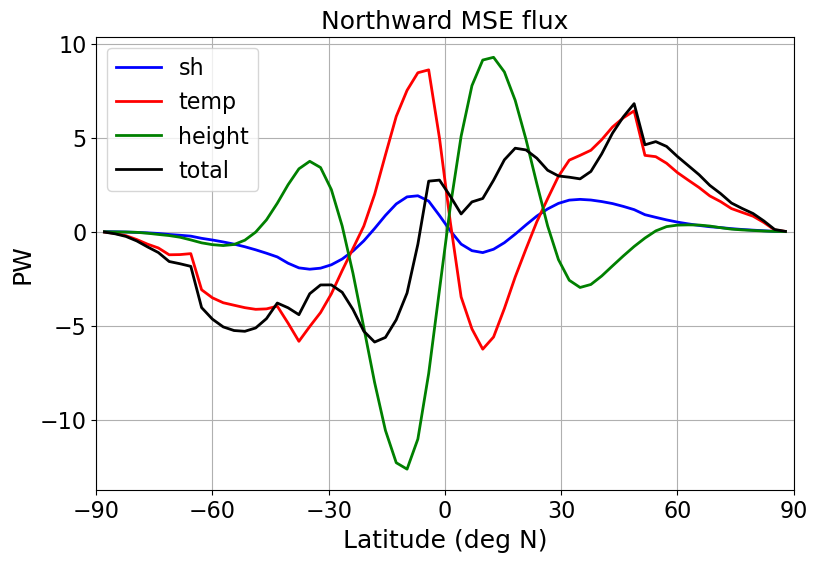

In [34]:
plt.figure(figsize=(9, 6),dpi=100)
moist.plot(lw=2,c='b',label='sh')
temp.plot(lw=2,c='r',label='temp')
height.plot(lw=2,c='g',label='height')
mse.plot(lw=2,c='k',label='total')
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('PW',fontsize=18)
plt.title('Northward MSE flux',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()
plt.show()

In [35]:
# get code for atmospheric heat transport

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


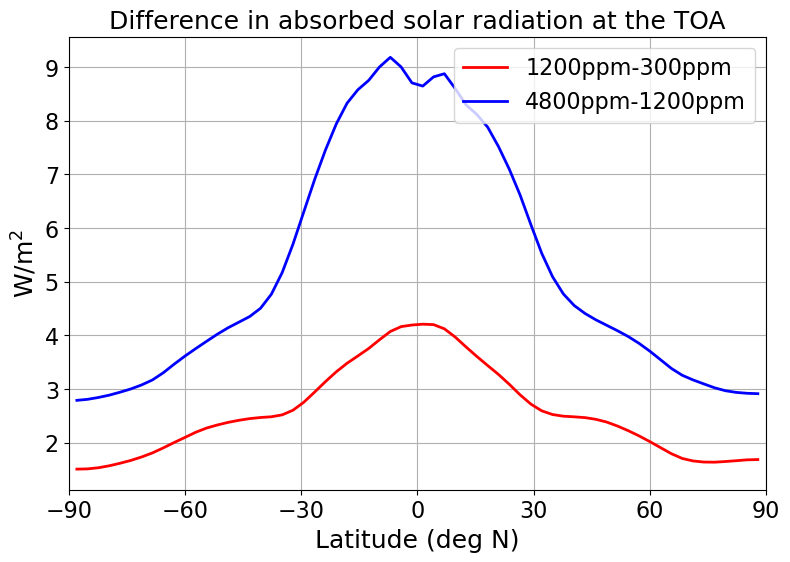

In [36]:
plt.figure(figsize=(9, 6),dpi=100)
diff_1200.soc_toa_sw.mean(('lon','months')).plot(lw=2,c='r',label='1200ppm-300ppm')
diff_4800.soc_toa_sw.mean(('lon','months')).plot(lw=2,c='b',label='4800ppm-1200ppm')
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('Difference in absorbed solar radiation at the TOA',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()
plt.savefig('fig2.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


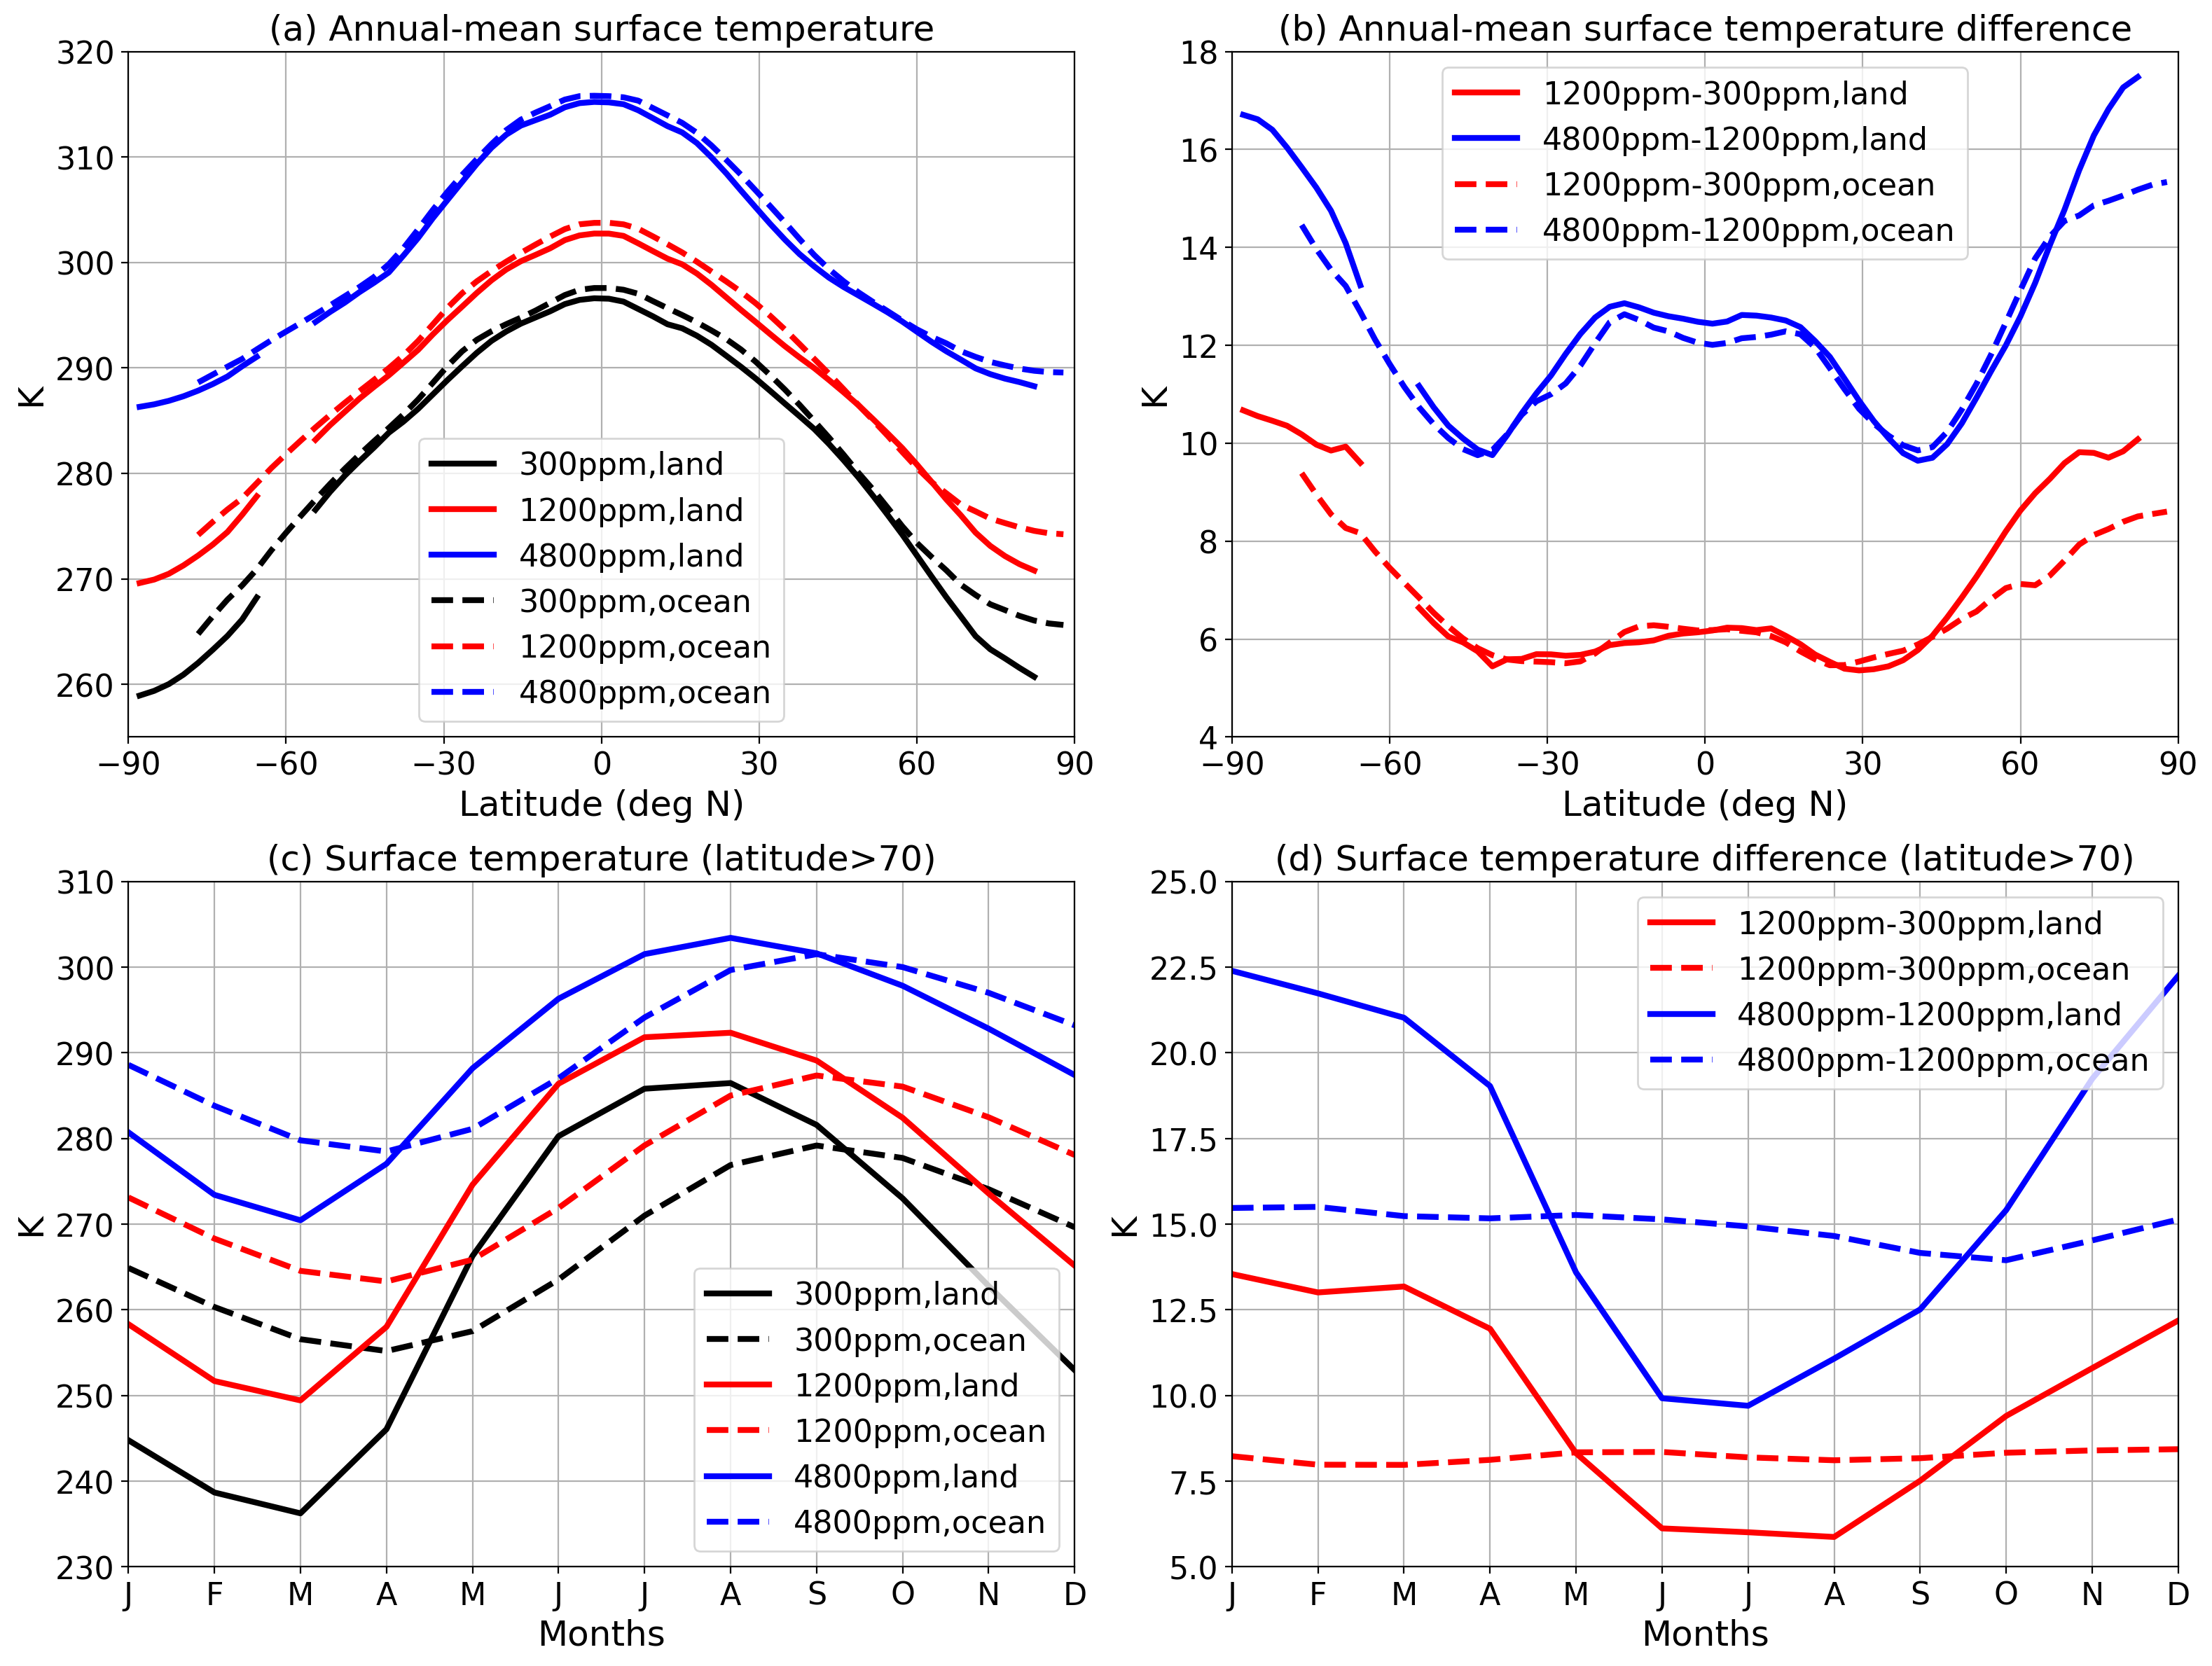

In [37]:
plt.figure(figsize=(16, 12),dpi=200)
plt.subplot(221)
ctl_300.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='k',label='300ppm,land')
ctl_1200.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='r',label='1200ppm,land')
ctl_4800.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='b',label='4800ppm,land')
ctl_300.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='k',label='300ppm,ocean')
ctl_1200.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='r',label='1200ppm,ocean')
ctl_4800.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='b',label='4800ppm,ocean')
plt.xlim([-90,90])
plt.ylim([255,320])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(a) Annual-mean surface temperature',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(222)
diff_1200.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='r',label='1200ppm-300ppm,land')
diff_4800.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='b',label='4800ppm-1200ppm,land')
diff_1200.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='r',label='1200ppm-300ppm,ocean')
diff_4800.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='b',label='4800ppm-1200ppm,ocean')
plt.xlim([-90,90])
plt.ylim([4,18])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(b) Annual-mean surface temperature difference',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(223)
ctl_300.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',label='300ppm,land')
ctl_300.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',ls='--',label='300ppm,ocean')
ctl_1200.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='1200ppm,land')
ctl_1200.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='1200ppm,ocean')
ctl_4800.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='4800ppm,land')
ctl_4800.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='4800ppm,ocean')
plt.xlim([1,12])
plt.ylim([230,310])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(c) Surface temperature (latitude>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(224)
diff_1200.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='1200ppm-300ppm,land')
diff_1200.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='1200ppm-300ppm,ocean')
diff_4800.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='4800ppm-1200ppm,land')
diff_4800.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='4800ppm-1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([5,25])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(d) Surface temperature difference (latitude>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('fig3.eps')
plt.show()

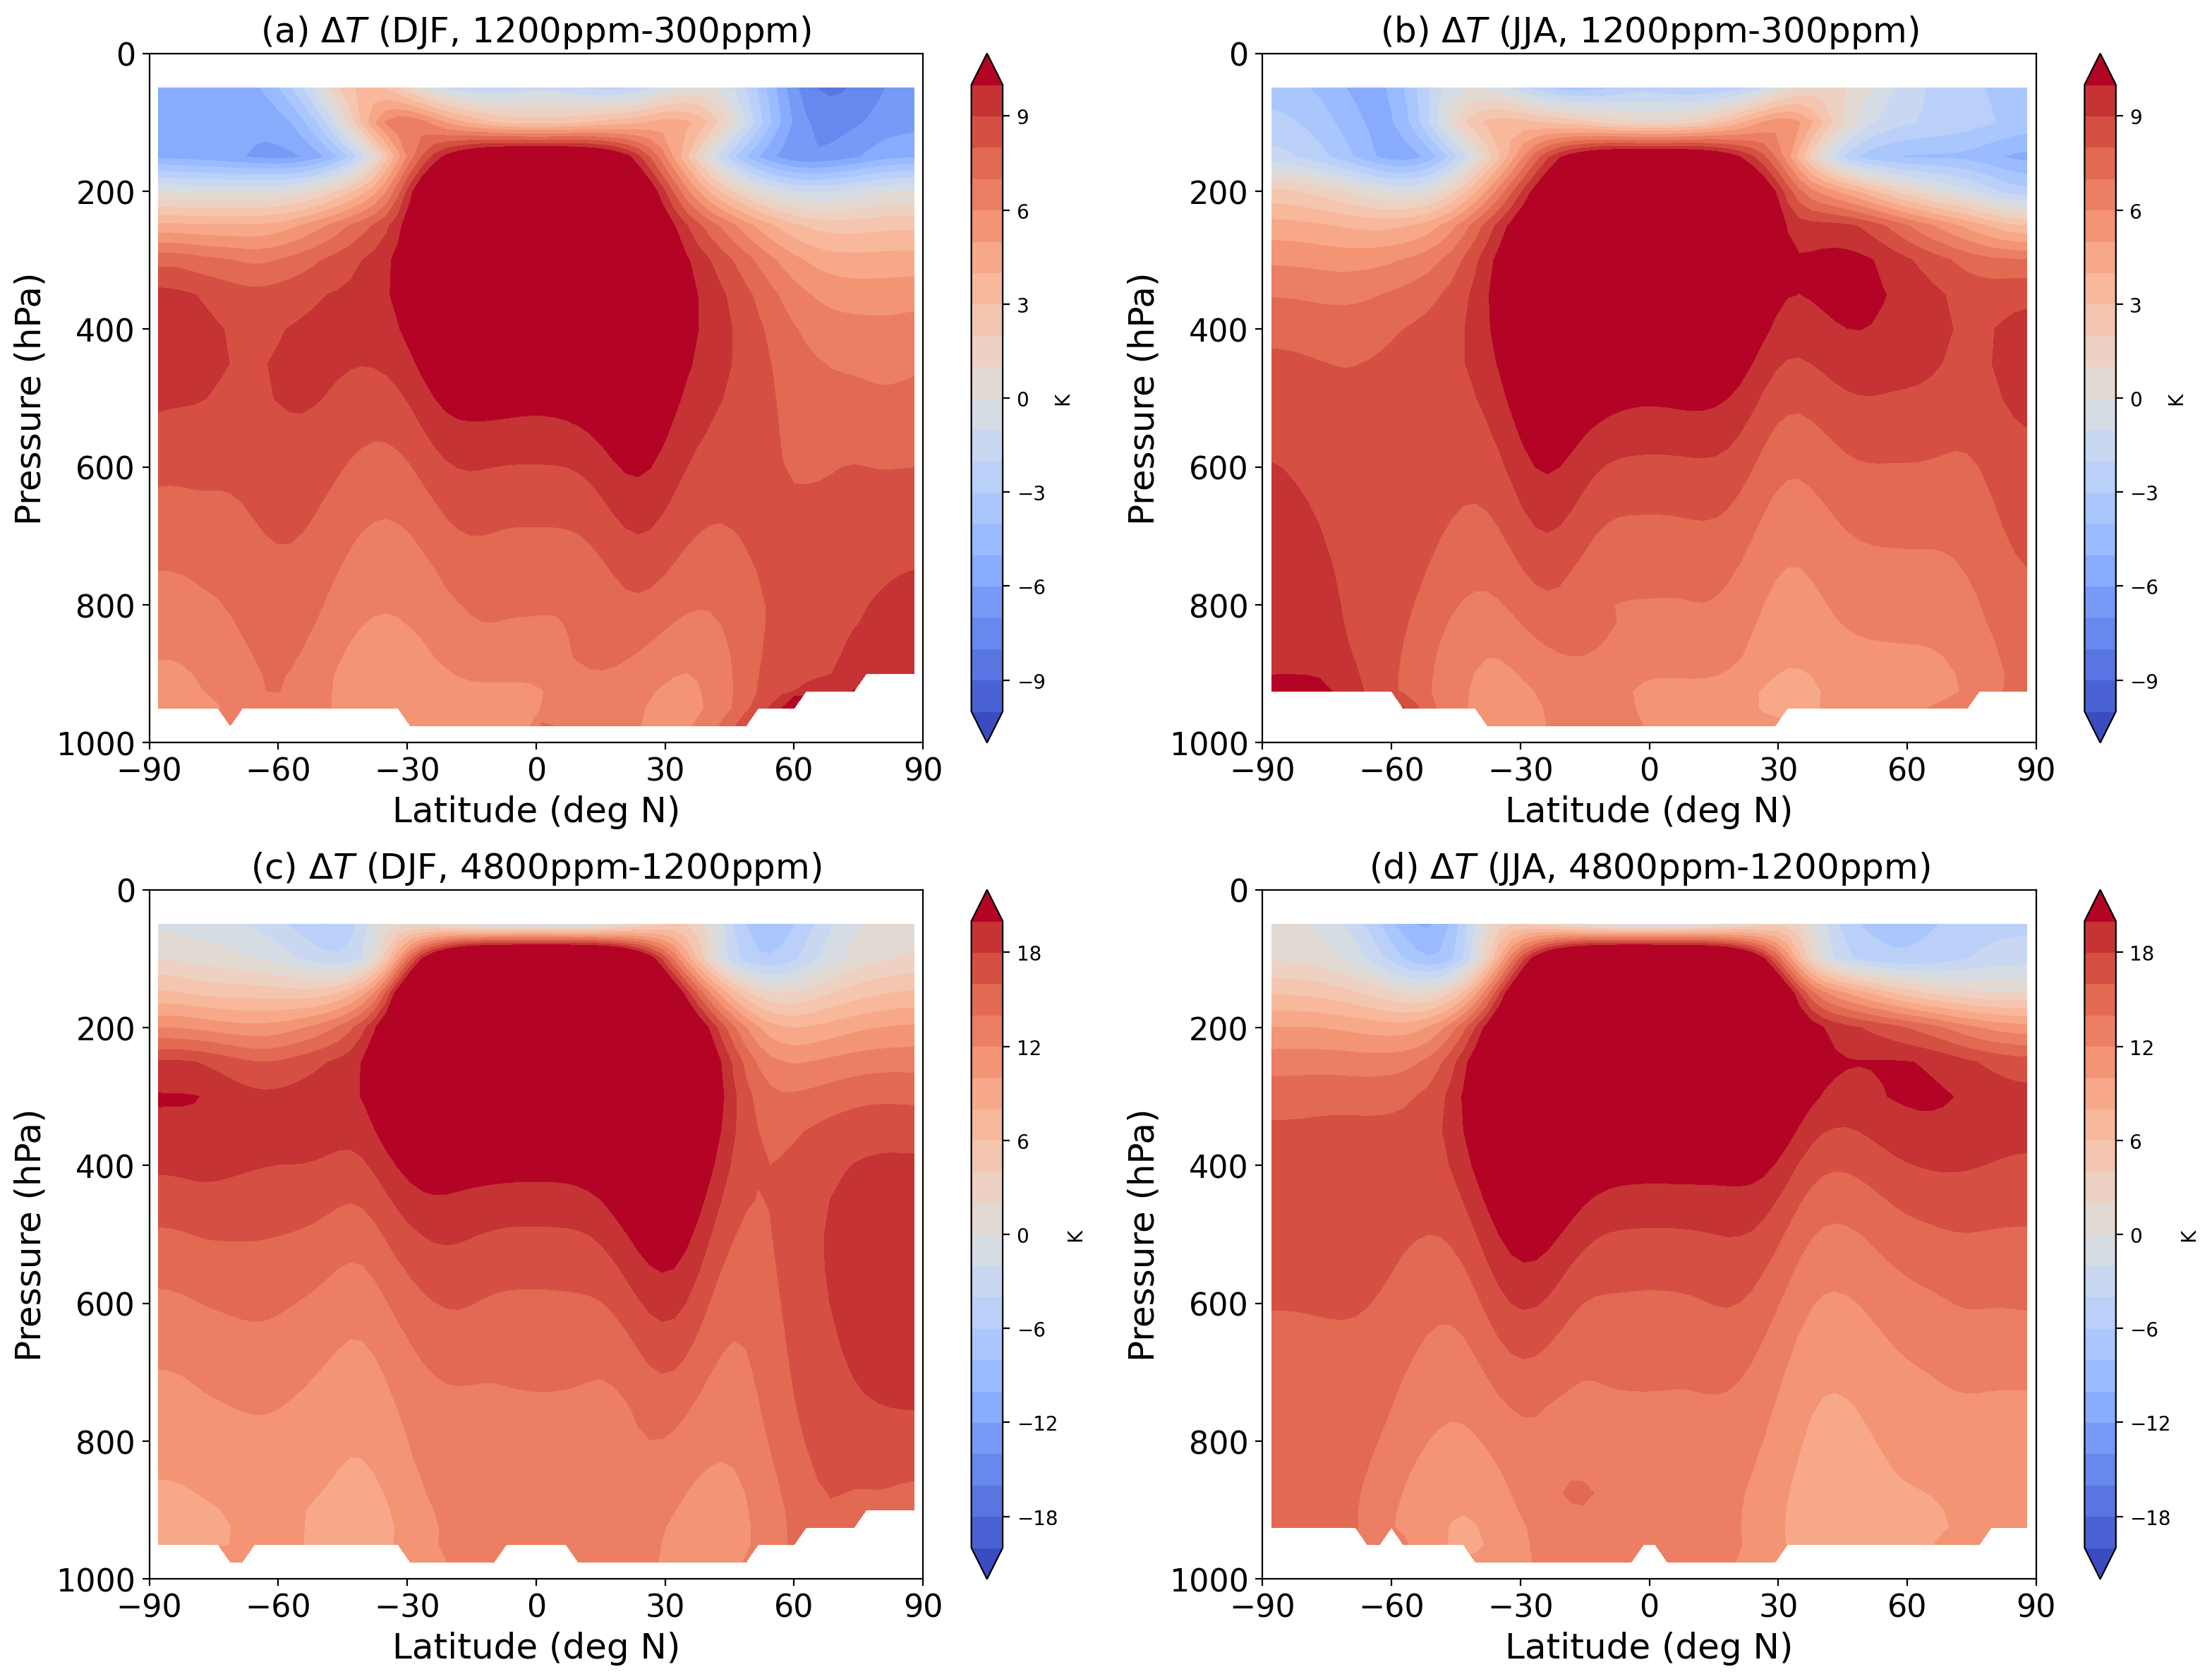

In [38]:
temp_diff_1200 = diff_1200.temp.where(np.abs(diff_1200.temp)<1e10)
temp_diff_4800 = diff_4800.temp.where(np.abs(diff_4800.temp)<1e10)

#for size of labels, check this: https://github.com/pydata/xarray/issues/3275

plt.figure(figsize=(16, 12),dpi=200)
plt.subplot(221)
temp_diff_1200.isel(months=[0,1,2]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-10,10,21),extend='both',cmap='coolwarm',cbar_kwargs={"label": "K"})
plt.xlim([-90,90])
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(a) $\Delta T$ (DJF, 1200ppm-300ppm)',fontsize=18)

plt.subplot(222)
temp_diff_1200.isel(months=[6,7,8]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-10,10,21),extend='both',cmap='coolwarm',cbar_kwargs={"label": "K"})
plt.xlim([-90,90])
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(b) $\Delta T$ (JJA, 1200ppm-300ppm)',fontsize=18)

plt.subplot(223)
temp_diff_4800.isel(months=[0,1,2]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-20,20,21),extend='both',cmap='coolwarm',cbar_kwargs={"label": "K"})
plt.xlim([-90,90])
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(c) $\Delta T$ (DJF, 4800ppm-1200ppm)',fontsize=18)

plt.subplot(224)
temp_diff_4800.isel(months=[6,7,8]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-20,20,21),extend='both',cmap='coolwarm',cbar_kwargs={"label": "K"})
plt.xlim([-90,90])
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(d) $\Delta T$ (JJA, 4800ppm-1200ppm)',fontsize=18)

plt.tight_layout()
plt.savefig('fig4.eps')
plt.show()

In [39]:
# Get CMIP6 plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


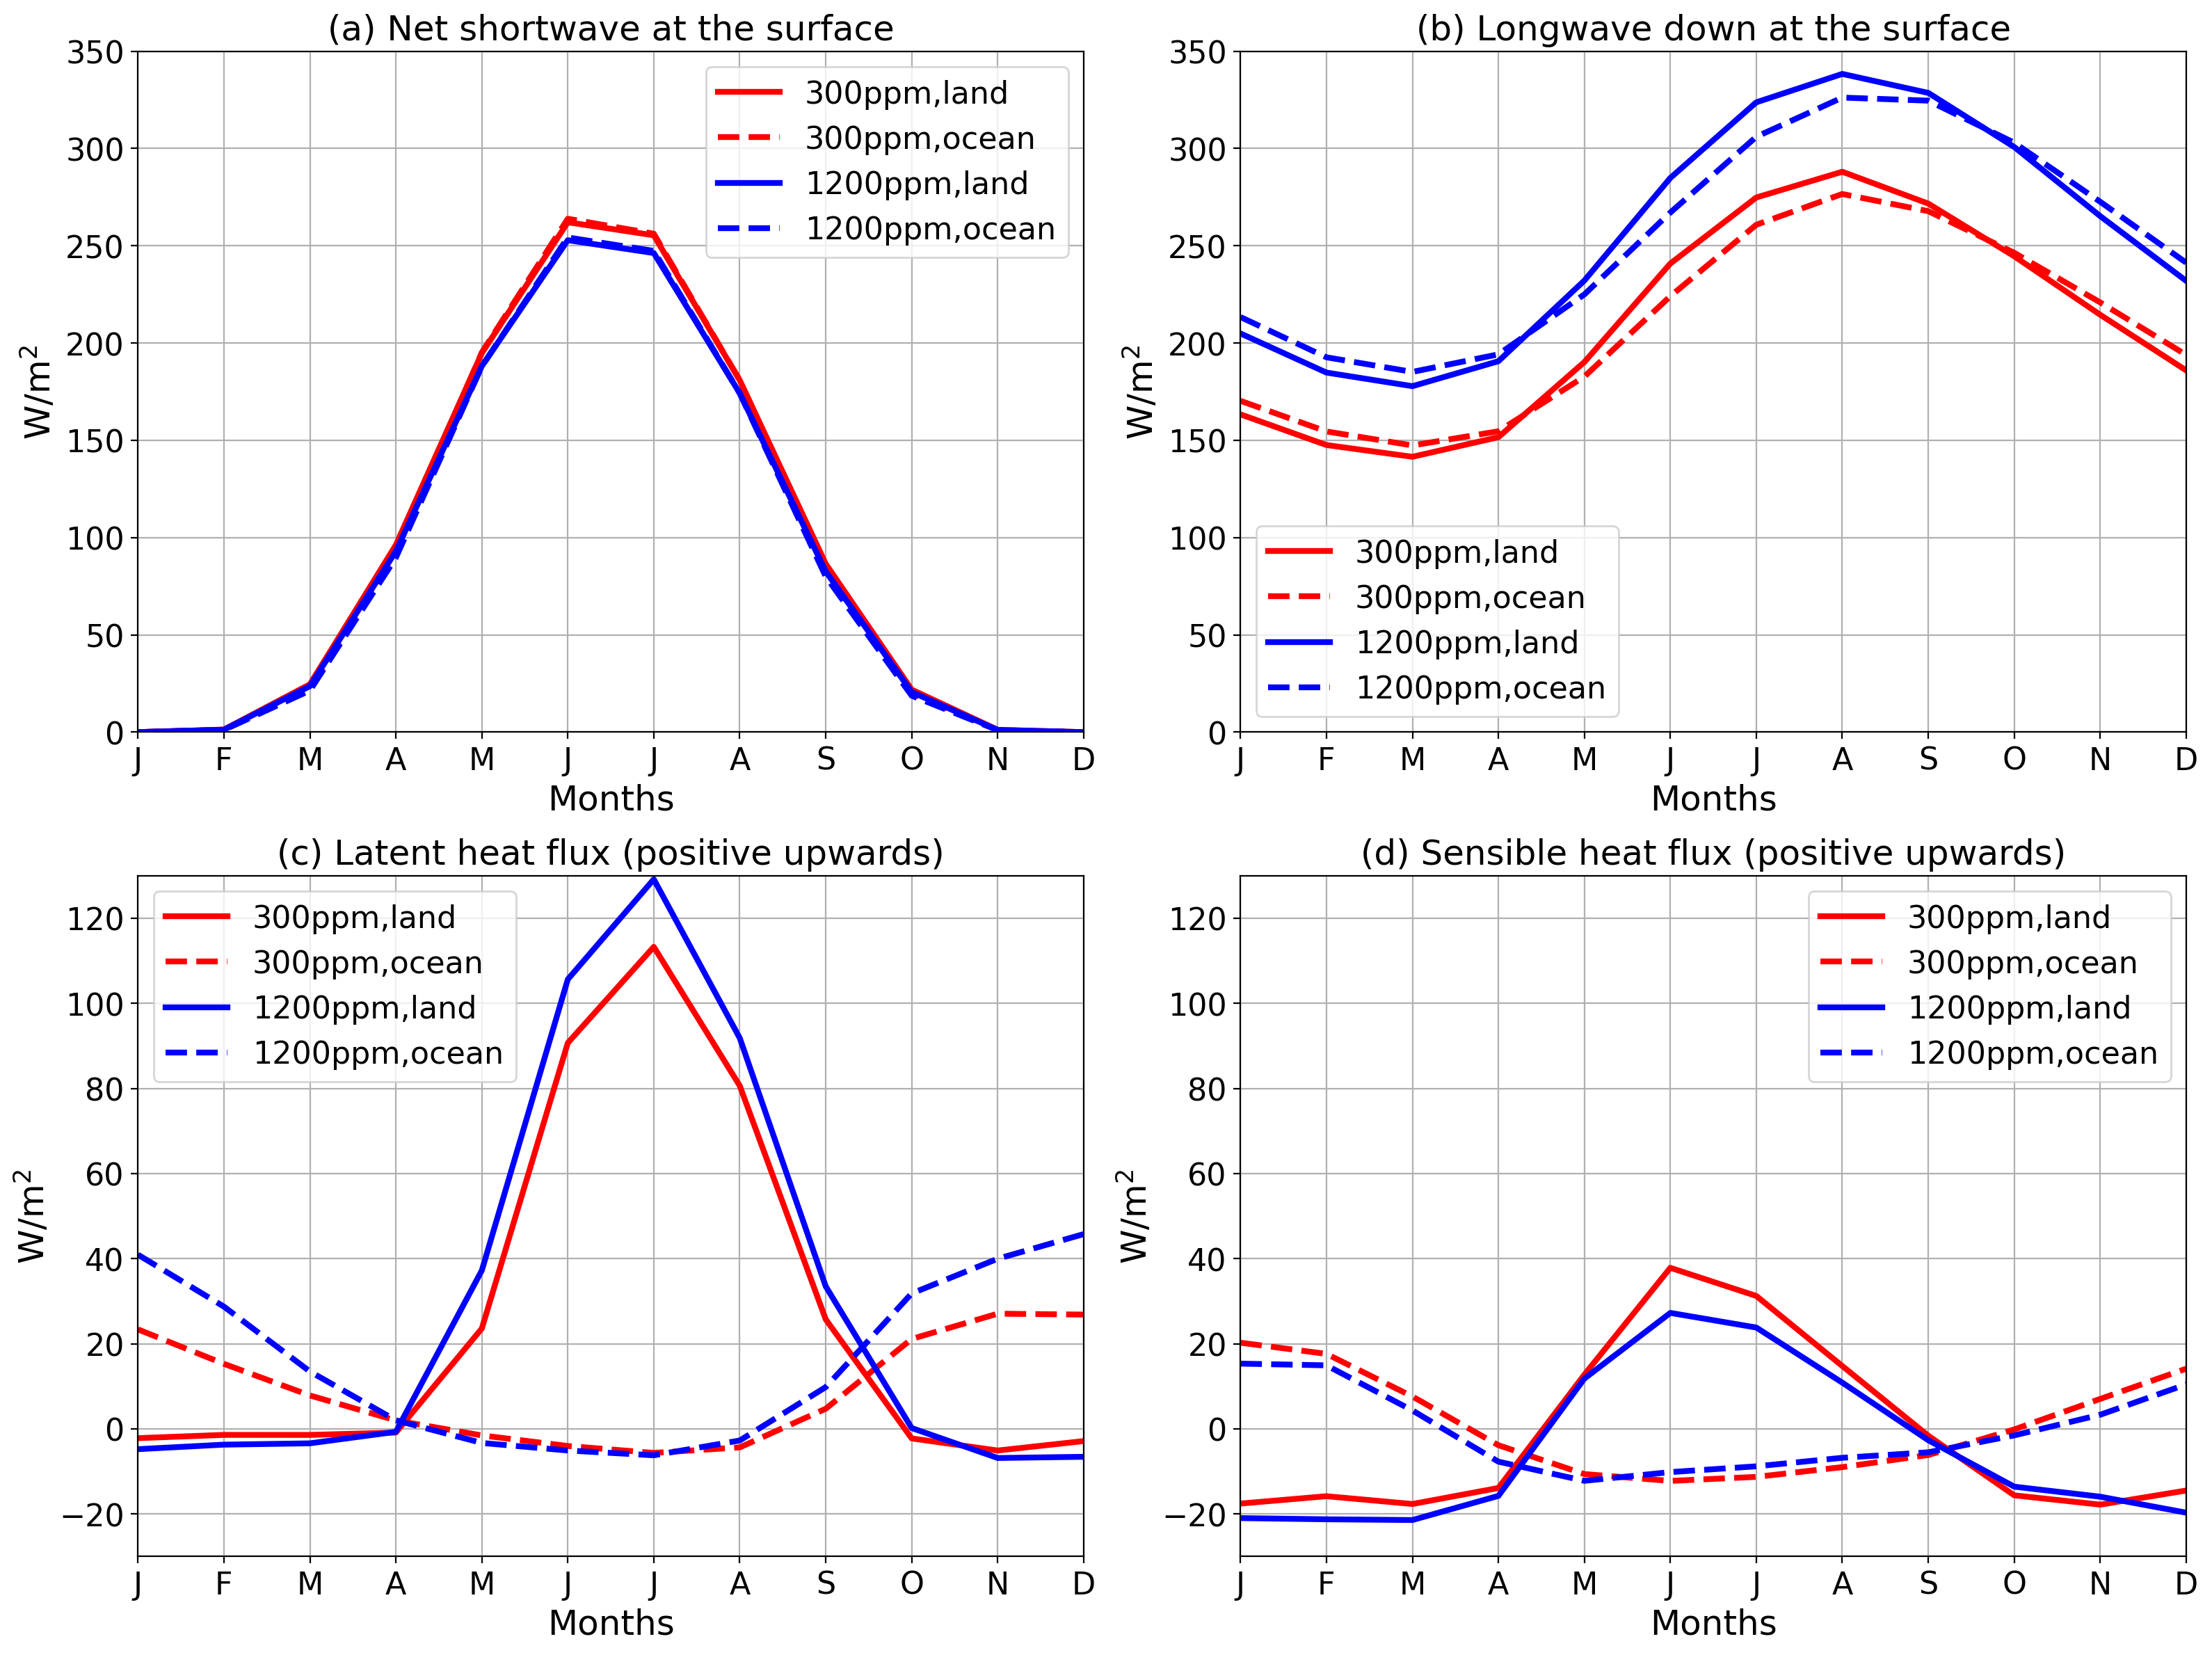

In [40]:
plt.figure(figsize=(16, 12),dpi=200)
plt.subplot(221)
ctl_300.soc_surf_flux_sw.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='300ppm,land')
ctl_300.soc_surf_flux_sw.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='300ppm,ocean')
ctl_1200.soc_surf_flux_sw.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='1200ppm,land')
ctl_1200.soc_surf_flux_sw.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([0,350])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(a) Net shortwave at the surface',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(222)
ctl_300.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='300ppm,land')
ctl_300.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='300ppm,ocean')
ctl_1200.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='1200ppm,land')
ctl_1200.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([0,350])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(b) Longwave down at the surface',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(223)
ctl_300.flux_lhe.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='300ppm,land')
ctl_300.flux_lhe.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='300ppm,ocean')
ctl_1200.flux_lhe.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='1200ppm,land')
ctl_1200.flux_lhe.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([-30,130])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(c) Latent heat flux (positive upwards)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(224)
ctl_300.flux_t.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='300ppm,land')
ctl_300.flux_t.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='300ppm,ocean')
ctl_1200.flux_t.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='1200ppm,land')
ctl_1200.flux_t.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([-30,130])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(d) Sensible heat flux (positive upwards)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('fig6.eps')
plt.show()

In [52]:
sw_300_land = ctl_300.soc_surf_flux_sw.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
sw_300_ocean = ctl_300.soc_surf_flux_sw.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
sw_1200_land = ctl_1200.soc_surf_flux_sw.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
sw_1200_ocean = ctl_1200.soc_surf_flux_sw.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lw_300_land = ctl_300.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lw_300_ocean = ctl_300.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lw_1200_land = ctl_1200.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lw_1200_ocean = ctl_1200.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lhe_300_land = ctl_300.flux_lhe.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lhe_300_ocean = ctl_300.flux_lhe.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lhe_1200_land = ctl_1200.flux_lhe.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lhe_1200_ocean = ctl_1200.flux_lhe.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
t_300_land = ctl_300.flux_t.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
t_300_ocean = ctl_300.flux_t.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
t_1200_land = ctl_1200.flux_t.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
t_1200_ocean = ctl_1200.flux_t.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)

In [53]:
sw_300_land

<xarray.DataArray (months: 12)>
array([  0.        ,   1.33434047,  24.59642439,  96.21404438,
       194.85797888, 262.09635218, 255.39834185, 180.87111435,
        86.52128397,  21.86123815,   1.21916989,   0.        ])
Coordinates:
  * months   (months) int64 1 2 3 4 5 6 7 8 9 10 11 12

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


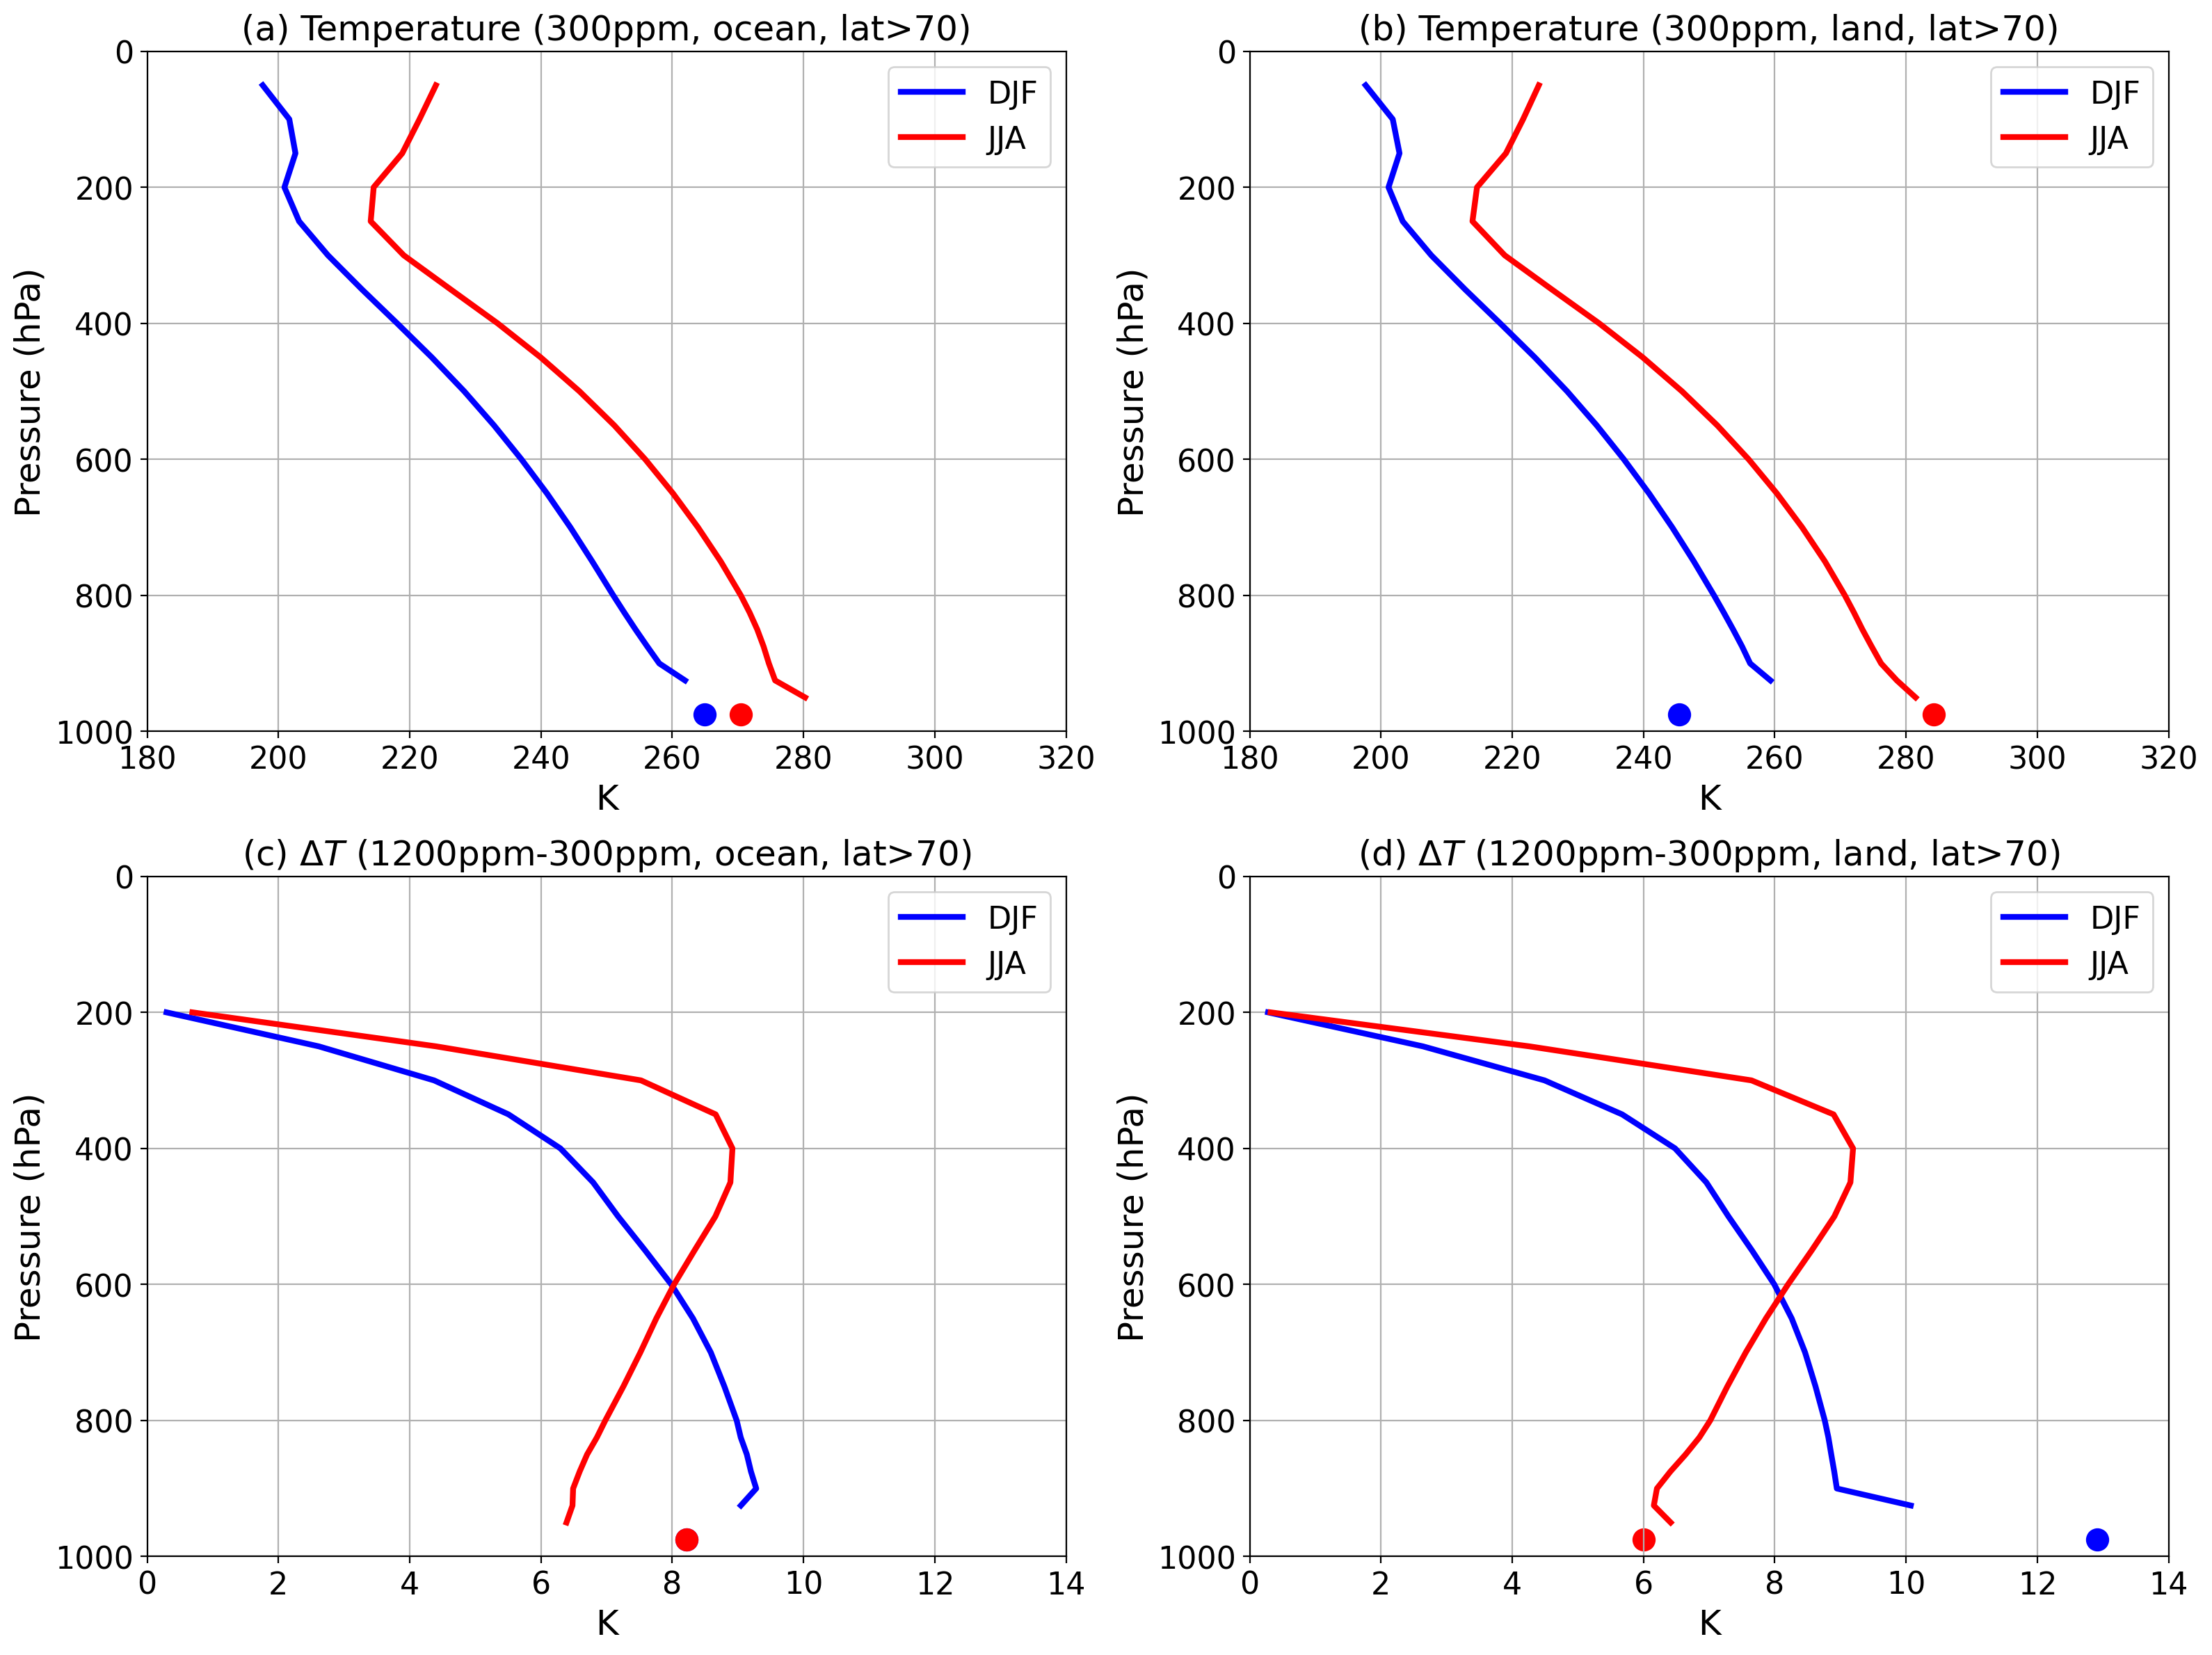

In [42]:
temp_300 = ctl_300.temp.where(np.abs(ctl_300.temp)<1e10)

plt.figure(figsize=(16, 12),dpi=200)
plt.subplot(221)
temp_300.isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='DJF')
temp_300.isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='JJA')
plt.scatter(ctl_300.t_surf.isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',lw=6)
plt.scatter(ctl_300.t_surf.isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',lw=6)
plt.xlim([180,320])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(a) Temperature (300ppm, ocean, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(222)
temp_300.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='DJF')
temp_300.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='JJA')
plt.scatter(ctl_300.t_surf.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',lw=6)
plt.scatter(ctl_300.t_surf.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',lw=6)
plt.xlim([180,320])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(b) Temperature (300ppm, land, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(223)
temp_diff_1200.where(temp_diff_1200>0).isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='DJF')
temp_diff_1200.where(temp_diff_1200>0).isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='JJA')
plt.scatter(diff_1200.t_surf.isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',lw=6)
plt.scatter(diff_1200.t_surf.isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',lw=6)
plt.xlim([180,320])
plt.xlim([0,14])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(c) $\Delta T$ (1200ppm-300ppm, ocean, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(224)
temp_diff_1200.where(temp_diff_1200>0).isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='DJF')
temp_diff_1200.where(temp_diff_1200>0).isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='JJA')
plt.scatter(diff_1200.t_surf.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',lw=6)
plt.scatter(diff_1200.t_surf.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',lw=6)
plt.xlim([0,14])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(d) $\Delta T$ (1200ppm-300ppm, land, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('fig8.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


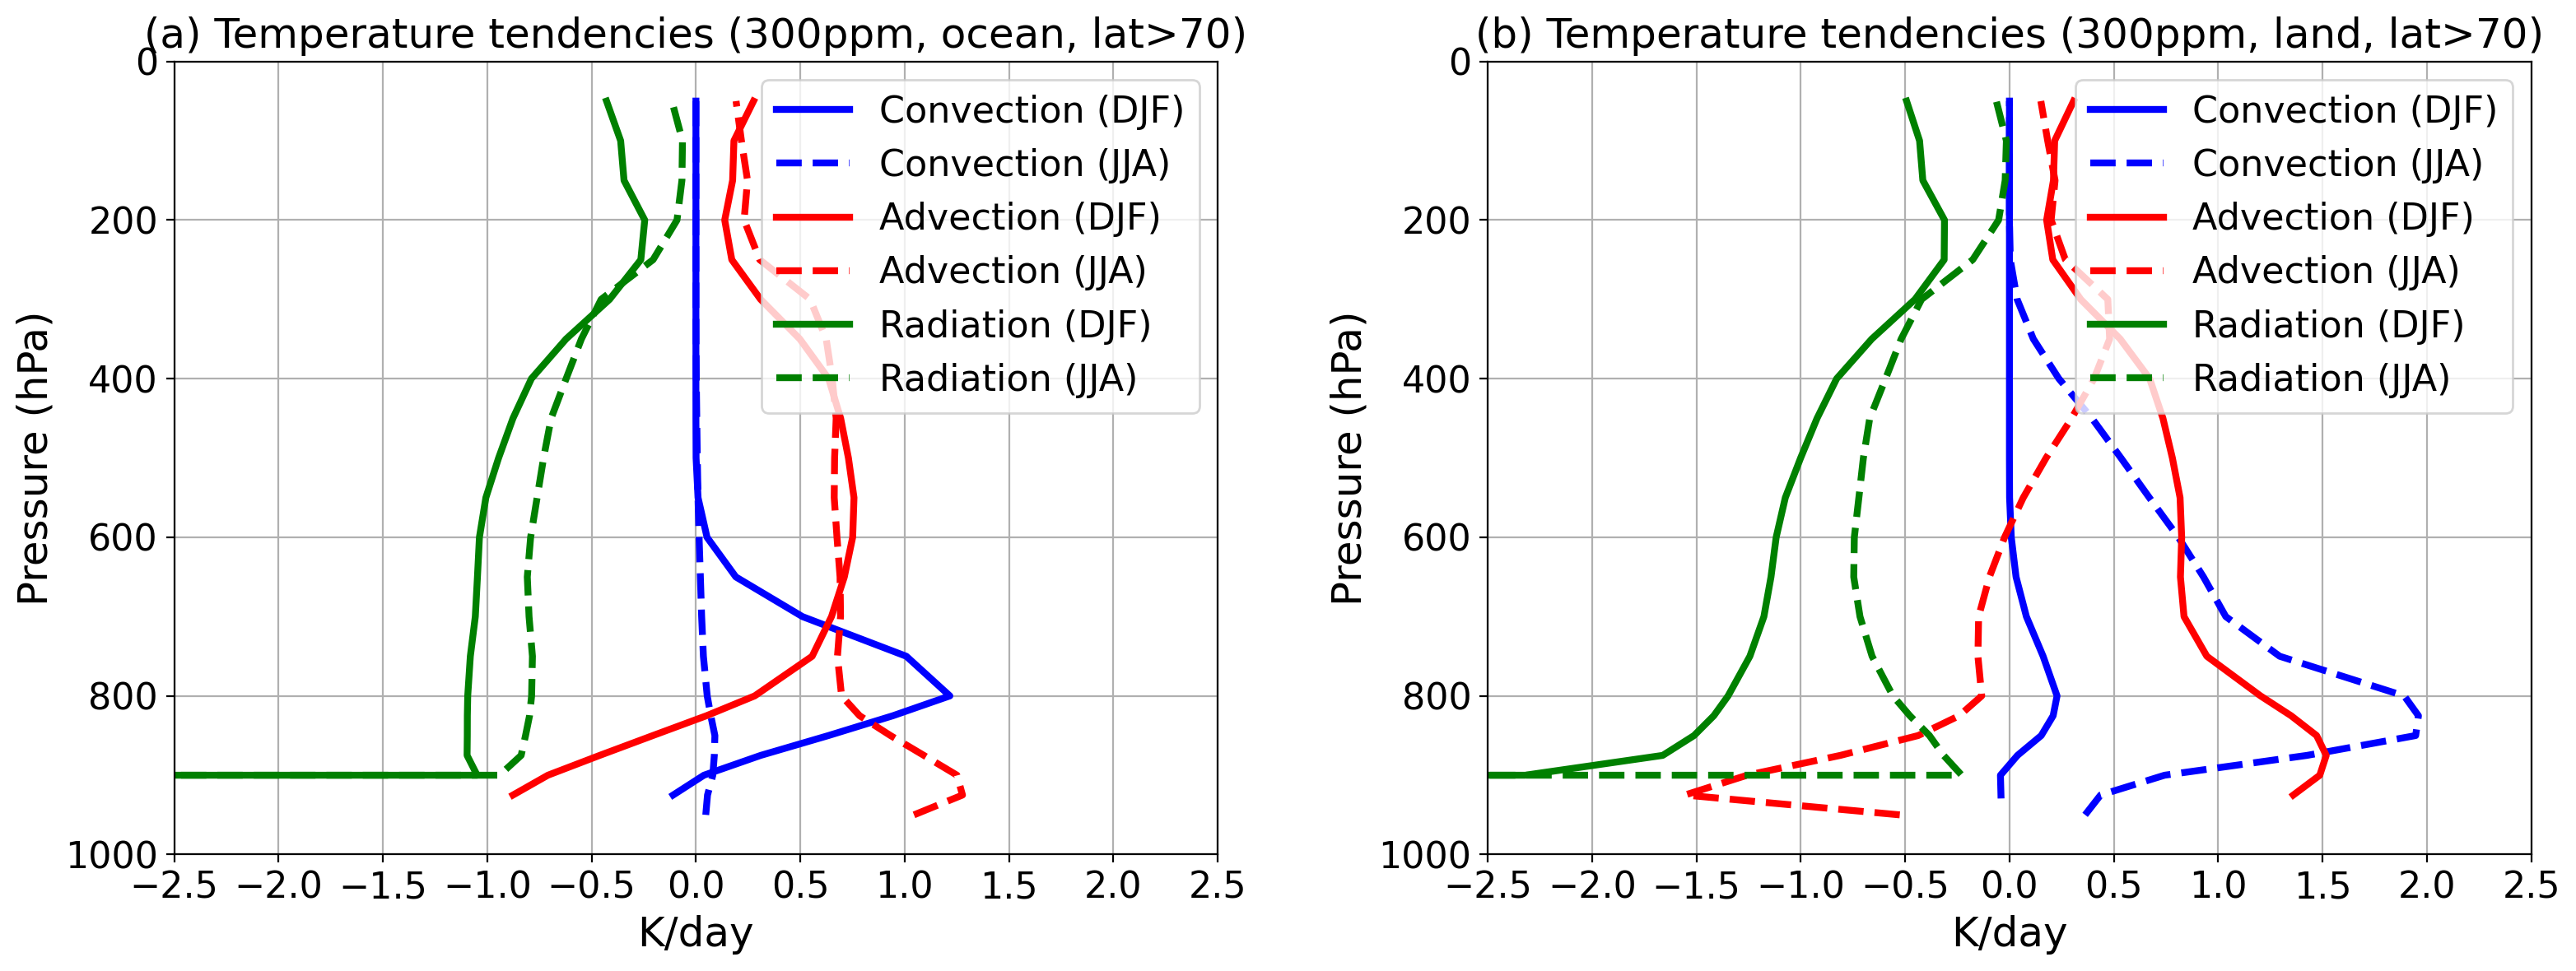

In [50]:
adv_300 = ctl_300.dt_tg_advection.where(np.abs(ctl_300.temp)<1e10)*3600*24
conv_300 = ctl_300.dt_tg_convection.where(np.abs(ctl_300.temp)<1e10)*3600*24
rad_300 = ctl_300.soc_tdt_rad.where(np.abs(ctl_300.soc_tdt_rad)<1e10)*3600*24

plt.figure(figsize=(16, 6),dpi=200)
plt.subplot(121)
conv_300.isel(months=[0,1,2]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='Convection (DJF)')
conv_300.isel(months=[6,7,8]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',ls='--',lw=3,label='Convection (JJA)')
adv_300.isel(months=[0,1,2]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='Advection (DJF)')
adv_300.isel(months=[6,7,8]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',ls='--',lw=3,label='Advection (JJA)')
rad_300.isel(months=[0,1,2]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',lw=3,label='Radiation (DJF)')
rad_300.isel(months=[6,7,8]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',ls='--',lw=3,label='Radiation (JJA)')
plt.xlim([-2.5,2.5])
plt.ylim([1000,0])
plt.xticks(np.linspace(-2.5,2.5,11),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K/day',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(a) Temperature tendencies (300ppm, ocean, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(122)
conv_300.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='Convection (DJF)')
conv_300.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',ls='--',lw=3,label='Convection (JJA)')
adv_300.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='Advection (DJF)')
adv_300.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',ls='--',lw=3,label='Advection (JJA)')
rad_300.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',lw=3,label='Radiation (DJF)')
rad_300.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',ls='--',lw=3,label='Radiation (JJA)')
plt.xlim([-2.5,2.5])
plt.ylim([1000,0])
plt.xticks(np.linspace(-2.5,2.5,11),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K/day',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(b) Temperature tendencies (300ppm, land, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('fig9.eps')
plt.show()

In [46]:
conv_300.isel(months=[0,1,2]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat')

<xarray.DataArray (pfull: 24, months: 12)>
array([[            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan],
       [-1.09239293e-01, -1.09239293e-01, -1.09239293e-01,
        -1.09239293e-01, -1.09239293e-01, -1.09239293e-01,
        -1.09239293e-01, -1.09239293e-01, -1.09239293e-01,
        -1.09239293e-01, -1.09239293e-01, -1.09239293e-01],
       [ 3.83744297e-02,  3.83744297e-02,  3.83744297e-02,
         3.83744297e-02,  3.83744297e-02,  3.83744297e-02,
         3.83744297e-02,  3.83744297e-02,  3.83744297e-02,
         3.83744297e-02,  3.83744297e-02,  3.83744297e-02],
       [ 3.10493033e-01,  3.10493033e-01,  3.10493033e-01,
         3.10493033e-01,  3.10493033e-01,  3.10493033e-01,
         3.10493033e-01,  3.10493033e-01,  3.10493033e-01,
         3.10493033e-01,  3.10493033e-01,  3.10493033e-01],
       [ 6.34930374e-01,  6.34930374e-01,  6.34930374e-01,
         6.34930374e-01,  6.34930374e-01,  6.34930374e-01,
         6.34930374e-01,  6.34930374e-01,  6.34930374e-01,
         6.34930374e-01,  6.34930374e-01,  6.34930374e-01],
       [ 9.43883444e-01,  9.43883444e-01,  9.43883444e-01,
         9.43883444e-01,  9.43883444e-01,  9.43883444e-01,
         9.43883444e-01,  9.43883444e-01,  9.43883444e-01,
         9.43883444e-01,  9.43883444e-01,  9.43883444e-01],
       [ 1.21679005e+00,  1.21679005e+00,  1.21679005e+00,
         1.21679005e+00,  1.21679005e+00,  1.21679005e+00,
         1.21679005e+00,  1.21679005e+00,  1.21679005e+00,
         1.21679005e+00,  1.21679005e+00,  1.21679005e+00],
       [ 1.00807707e+00,  1.00807707e+00,  1.00807707e+00,
         1.00807707e+00,  1.00807707e+00,  1.00807707e+00,
         1.00807707e+00,  1.00807707e+00,  1.00807707e+00,
         1.00807707e+00,  1.00807707e+00,  1.00807707e+00],
       [ 5.10381970e-01,  5.10381970e-01,  5.10381970e-01,
         5.10381970e-01,  5.10381970e-01,  5.10381970e-01,
         5.10381970e-01,  5.10381970e-01,  5.10381970e-01,
         5.10381970e-01,  5.10381970e-01,  5.10381970e-01],
       [ 1.91289085e-01,  1.91289085e-01,  1.91289085e-01,
         1.91289085e-01,  1.91289085e-01,  1.91289085e-01,
         1.91289085e-01,  1.91289085e-01,  1.91289085e-01,
         1.91289085e-01,  1.91289085e-01,  1.91289085e-01],
       [ 5.32530425e-02,  5.32530425e-02,  5.32530425e-02,
         5.32530425e-02,  5.32530425e-02,  5.32530425e-02,
         5.32530425e-02,  5.32530425e-02,  5.32530425e-02,
         5.32530425e-02,  5.32530425e-02,  5.32530425e-02],
       [ 1.01530715e-02,  1.01530715e-02,  1.01530715e-02,
         1.01530715e-02,  1.01530715e-02,  1.01530715e-02,
         1.01530715e-02,  1.01530715e-02,  1.01530715e-02,
         1.01530715e-02,  1.01530715e-02,  1.01530715e-02],
       [ 7.94678692e-04,  7.94678692e-04,  7.94678692e-04,
         7.94678692e-04,  7.94678692e-04,  7.94678692e-04,
         7.94678692e-04,  7.94678692e-04,  7.94678692e-04,
         7.94678692e-04,  7.94678692e-04,  7.94678692e-04],
       [ 4.89111364e-05,  4.89111364e-05,  4.89111364e-05,
         4.89111364e-05,  4.89111364e-05,  4.89111364e-05,
         4.89111364e-05,  4.89111364e-05,  4.89111364e-05,
         4.89111364e-05,  4.89111364e-05,  4.89111364e-05],
       [ 4.87126263e-06,  4.87126263e-06,  4.87126263e-06,
         4.87126263e-06,  4.87126263e-06,  4.87126263e-06,
         4.87126263e-06,  4.87126263e-06,  4.87

In [47]:
ocean

<xarray.DataArray 'ml_heat_cap' (months: 12, lat: 64, lon: 128)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       ...,

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * months   (months) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [44]:
ctl_300

<xarray.Dataset>
Dimensions:                (lat: 64, latb: 65, lon: 128, lonb: 129, months: 12, nv: 2, pfull: 24)
Coordinates:
  * lonb                   (lonb) float64 -1.406 1.406 4.219 ... 355.8 358.6
  * nv                     (nv) float64 1.0 2.0
  * latb                   (latb) float64 -90.0 -86.58 -83.76 ... 86.58 90.0
  * lon                    (lon) float64 0.0 2.812 5.625 ... 351.6 354.4 357.2
  * lat                    (lat) float64 -87.86 -85.1 -82.31 ... 85.1 87.86
  * pfull                  (pfull) float32 1000.0 975.0 950.0 ... 100.0 50.0
  * months                 (months) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    height                 (months, pfull, lat, lon) float32 -1000.0 ... 19395.947
    slp                    (months, lat, lon) float32 987.8626 ... 979.5596
    ps                     (months, lat, lon) float32 98786.266 ... 97955.95
    zsurf                  (months, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    precipitation          (months, lat, lon) float32 3.4725053e-05 ... 1.18985035e-05
    t_surf                 (months, lat, lon) float32 283.97388 ... 271.89218
    ml_heat_cap            (months, lat, lon) float32 8257737.0 ... 82577370.0
    albedo                 (months, lat, lon) float32 0.3 0.3 0.3 ... 0.3 0.3
    flux_oceanq            (months, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    flux_t                 (months, lat, lon) float32 17.236645 ... -2.87238
    flux_lhe               (months, lat, lon) float32 102.364494 ... 10.903089
    sphum                  (months, pfull, lat, lon) float32 nan ... 4.564678e-06
    ucomp                  (months, pfull, lat, lon) float32 nan ... 2.5368133
    vcomp                  (months, pfull, lat, lon) float32 nan ... -1.901797
    temp                   (months, pfull, lat, lon) float32 nan ... 207.03006
    vor                    (months, pfull, lat, lon) float32 nan ... 9.351422e-06
    div                    (months, pfull, lat, lon) float32 nan ... 4.5357535e-08
    pres_full              (months, pfull, lat, lon) float32 nan ... 5014.921
    dt_tg_advection        (months, pfull, lat, lon) float32 nan ... 4.8544525e-06
    dt_tg_convection       (months, pfull, lat, lon) float32 nan nan ... 0.0 0.0
    dt_qg_convection       (months, pfull, lat, lon) float32 nan nan ... 0.0 0.0
    dt_tg_condensation     (months, pfull, lat, lon) float32 nan nan ... 0.0 0.0
    dt_qg_condensation     (months, pfull, lat, lon) float32 nan nan ... 0.0 0.0
    dt_tg_diffusion        (months, pfull, lat, lon) float32 nan nan ... 0.0 0.0
    dt_qg_diffusion        (months, pfull, lat, lon) float32 nan nan ... 0.0 0.0
    vcomp_temp             (months, pfull, lat, lon) float32 nan ... -394.1581
    vcomp_height           (months, pfull, lat, lon) float32 nan ... -36912.79
    sphum_v                (months, pfull, lat, lon) float32 nan ... -8.918064e-06
    ucomp_temp             (months, pfull, lat, lon) float32 nan ... 519.2217
    ucomp_height           (months, pfull, lat, lon) float32 nan ... 49009.52
    sphum_u                (months, pfull, lat, lon) float32 nan ... 1.1784761e-05
    sphum_w                (months, pfull, lat, lon) float32 nan ... -1.5659488e-09
    omega                  (months, pfull, lat, lon) float32 nan ... -0.00033921527
    omega_temp             (months, pfull, lat, lon) float32 nan ... -0.06991968
    omega_height           (months, pfull, lat, lon) float32 nan ... -6.551275
    soc_tdt_lw             (months, pfull, lat, lon) float32 -999.0 ... -7.558131e-06
    soc_tdt_sw             (months, pfull, lat, lon) float32 -999.0 ... 0.0
    soc_tdt_rad            (months, pfull, lat, lon) float32 -999.0 ... -7.558131e-06
    soc_surf_flux_lw       (months, lat, lon) float32 113.3709 ... 92.292946
    soc_surf_flux_sw       (months, lat, lon) float32 267.68326 ... 0.0
    soc_surf_flux_lw_down  (months, lat, lon) float32 255.65894 ... 217.61414
    soc_surf_flux_sw_down  (months, lat, lon) float32 382.40466 ... 0